* Trying to find relationship between the data
* No target information is provided

#### Understanding MNIST data

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
digits.data[0].reshape(8,8)

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

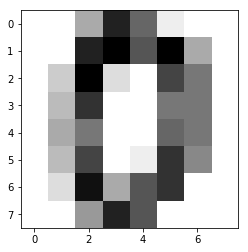

In [10]:
plt.imshow(digits.data[0].reshape(8,8), cmap=plt.cm.binary)

In [11]:
digits.target[0]

0

In [12]:
from sklearn.cluster import KMeans

In [16]:
cost = []
models = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(digits.data)
    models.append(kmeans)
    print (kmeans.score(digits.data))
    cost.append(-1 * kmeans.score(digits.data))

-2159057.29104
-1914619.61755
-1730184.70254
-1609622.17713
-1517377.39148
-1405060.98976
-1336524.36625
-1264975.58338
-1202276.482
-1165177.71371
-1131861.18509
-1103446.19924
-1070418.98134
-1046178.52557
-1024302.18353
-999621.016255
-992176.698273
-969299.766734
-958192.681217


In [14]:
cost

[2159057.291040625,
 1914619.617550103,
 1730184.7025430473,
 1609622.1771260197,
 1517377.3914802228,
 1405060.9897552272,
 1336524.3662530654,
 1264975.5833777112,
 1202276.4820005856,
 1165177.713706214,
 1131861.1850947463,
 1103446.1992377024,
 1070418.9813359315,
 1046178.5255676527,
 1024302.1835299364,
 999621.01625475567,
 992176.69827252859,
 969299.76673428656,
 958192.68121731409]

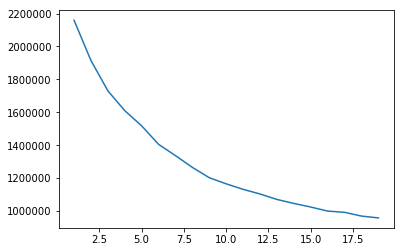

In [15]:
plt.plot(range(1,20), cost)

In [19]:
best_model = models[9]

In [20]:
clusters = best_model.predict(digits.data)

In [22]:
clusters.shape

(1797,)

In [28]:
import numpy as np
zero_cluster = np.where(clusters == 0)

In [29]:
#contents of cluster zero
digits.target[zero_cluster]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4])

In [30]:
from scipy.stats import mode

In [31]:
mode(digits.target[zero_cluster])

ModeResult(mode=array([4]), count=array([163]))

In [33]:
best_model.cluster_centers_.shape

(10, 64)

### Clustering on housing data

In [35]:
import pandas as pd

In [38]:
house_data = pd.read_csv('house_rental.csv.txt', index_col='Unnamed: 0')

In [39]:
cost = []
models = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(house_data)
    models.append(kmeans)
    print (kmeans.score(house_data))
    cost.append(-1 * kmeans.score(house_data))

-818168920887.0
-280633054694.0
-127250665827.0
-80767226715.3
-54475740578.6
-36746692875.0
-27605617193.6
-21790178314.8
-18208641773.2
-14326205271.7
-11774699602.1
-10046951028.4
-8380520072.15
-6807402759.02
-5813278826.15
-4734228394.62
-4188052547.18
-3574101108.83
-3260510640.35


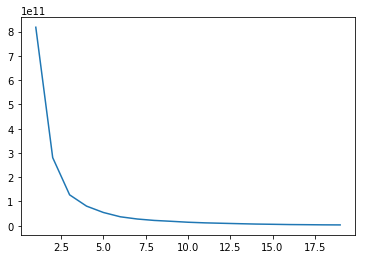

In [40]:
plt.plot(range(1,20), cost)

In [41]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [42]:
kmeans.fit(house_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [43]:
class_house = kmeans.predict(house_data)

In [46]:
house_data.iloc[np.where(class_house == 0)]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
7,1352.040,5,7,3,2,1,58000
8,757.854,5,14,1,0,1,48000
9,1152.792,10,12,3,2,2,45000
11,668.904,4,11,1,1,1,31000
12,711.600,4,7,2,1,1,29002
13,1352.040,9,19,4,2,2,39000


In [47]:
house_data.iloc[np.where(class_house == 1)]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
2,2134.800,5,7,4,2,2,78000
10,1423.200,4,5,4,2,2,65000
16,2768.124,6,19,3,2,2,100000
19,2739.660,6,19,3,2,2,90000
22,2768.124,6,19,3,2,2,100000
24,1668.702,4,12,3,2,2,105000
26,1779.000,10,12,4,2,2,98000
31,1732.746,8,12,4,2,2,65000
32,1245.300,10,12,3,0,0,85000
44,1352.040,1,4,4,2,2,65000


In [48]:
house_data.iloc[np.where(class_house == 2)]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
6,1127.886,11,12,4,2,2,148000
21,2490.600,19,21,5,3,4,140000
25,3664.740,19,19,3,2,3,200000
27,3664.740,19,19,3,2,3,200000
28,3059.880,21,24,4,2,3,145000
39,3735.900,19,19,3,2,3,200000
41,3063.438,21,24,5,2,4,145000
49,3735.900,19,19,3,2,3,200000
55,4643.190,1,6,5,4,4,180000
87,3255.570,4,7,4,2,4,130000


### Image Compression

In [49]:
from skimage.io import imread

In [51]:
img = imread('self-pic.JPG')

In [52]:
img.shape

(1215, 907, 3)

In [53]:
#image data needs to be scaled down as images are processed better between 0 & 1
img_tf = img/255.0

In [56]:
img_tf = img_tf.reshape(1215 * 907, 3)

In [57]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [58]:
kmeans.fit(img_tf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [59]:
predicted_colors = kmeans.predict(img_tf)

In [60]:
kmeans.cluster_centers_

array([[ 0.81516204,  0.82395935,  0.83574344],
       [ 0.25801143,  0.25131617,  0.27252548],
       [ 0.75749466,  0.56440051,  0.44741309]])

In [61]:
final_colors = kmeans.cluster_centers_[predicted_colors]

In [63]:
final_image = final_colors.reshape(1215,907,3)

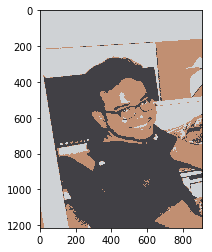

In [64]:
plt.imshow(final_image)

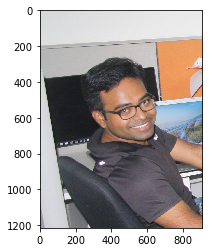

In [65]:
plt.imshow(img)